# Wine Quality

## This notebook is used to create a predictive model to classify wine as good or bad.

In [43]:
import pandas as pd
df_data_1 = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")


### Loading the packages

In [44]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
import seaborn as sns; sns.set_theme(style = "dark")
%matplotlib inline
import matplotlib.pyplot as plt

### Data Visualization

In [45]:
wine = df_data_1

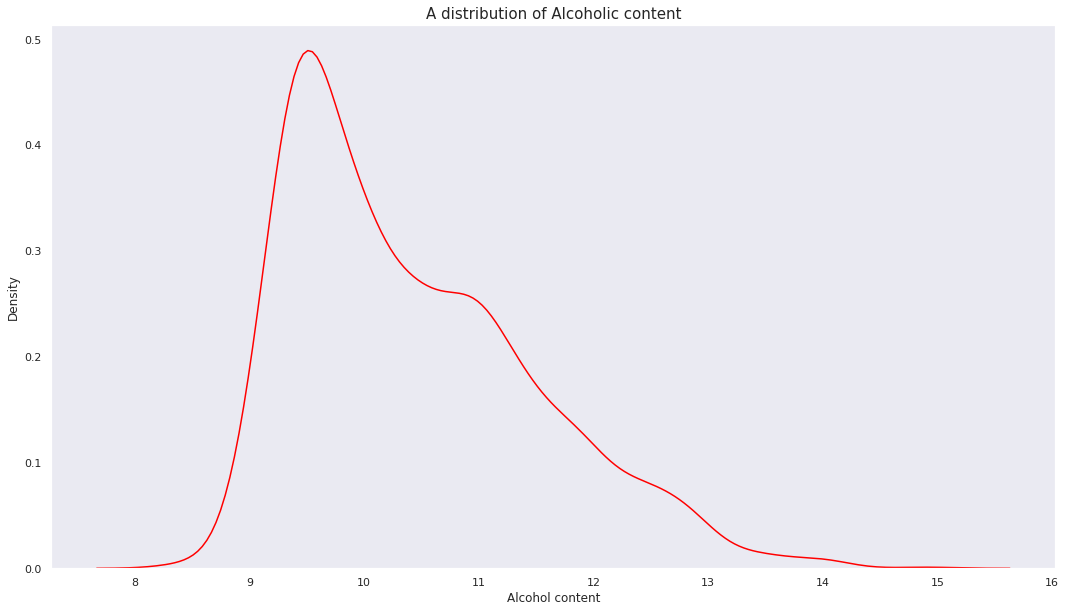

In [46]:
plt.figure(figsize = (18,10))
sns.kdeplot(x = "alcohol", data = wine, color = "red")
plt.xlabel("Alcohol content")
plt.ylabel("Density")
plt.title("A distribution of Alcoholic content", fontsize = 15)
plt.show();

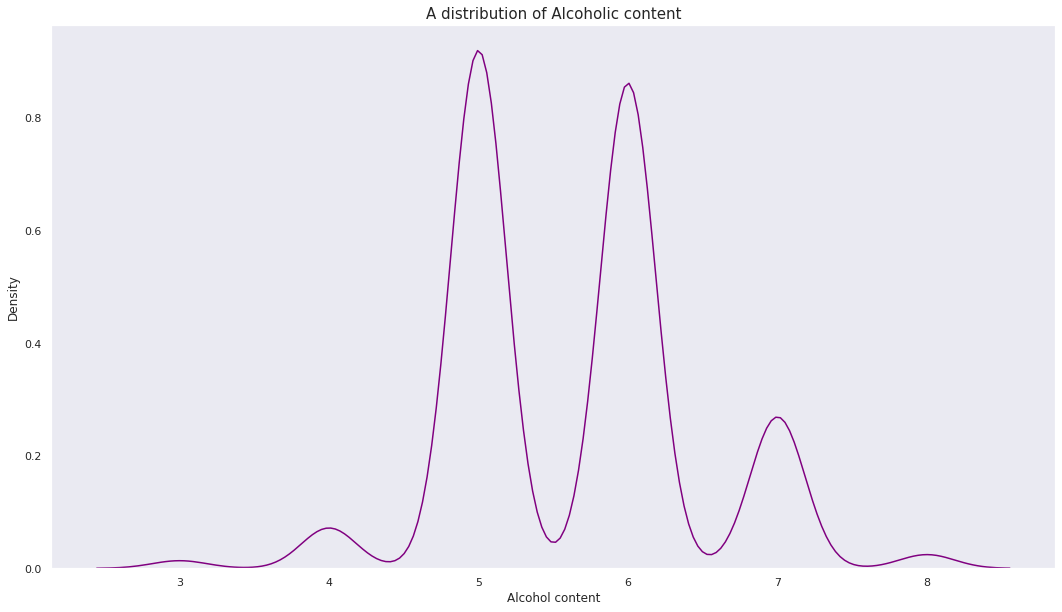

In [47]:
plt.figure(figsize = (18,10))
sns.kdeplot(x = "quality", data = wine, color = "purple")
plt.xlabel("Alcohol content")
plt.ylabel("Density")
plt.title("A distribution of Alcoholic content", fontsize = 15)
plt.show();

### Building Predictive Model

In [48]:
x_wine = wine.iloc[:,:-1]
y_wine = wine.iloc[:,-1]
y_wine_bi = (y_wine >= 5.5).astype(int)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine_bi, train_size = 0.8, random_state = 42)

In [50]:
cor = wine.corr()

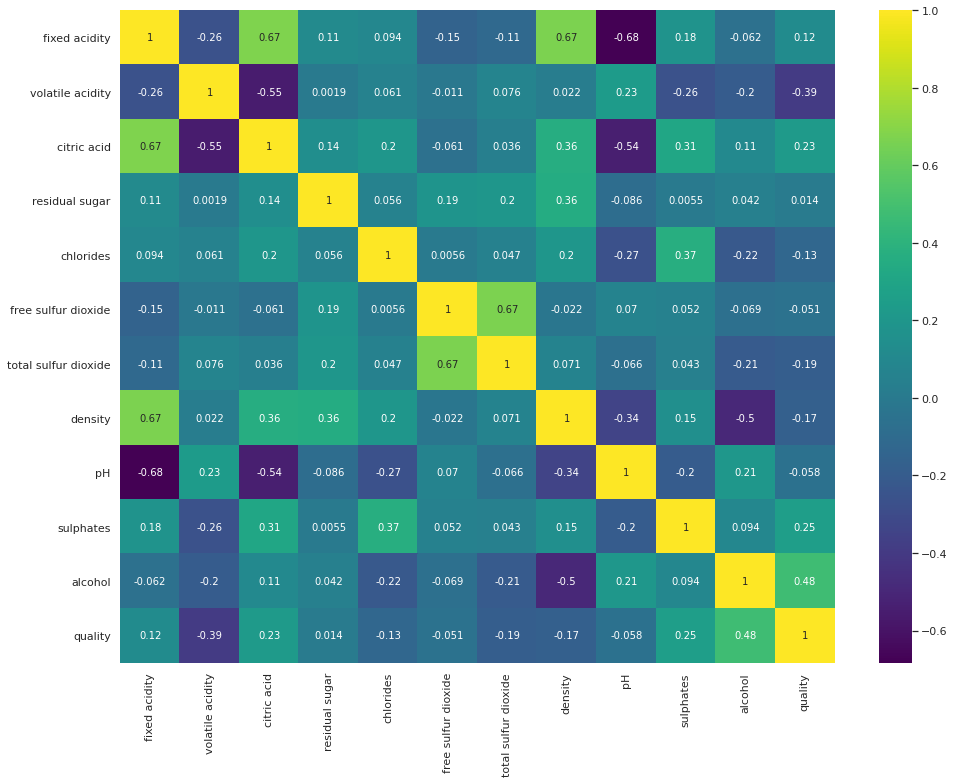

In [51]:
plt.figure(figsize = (16,12))
sns.heatmap(cor, annot = True, cmap = "viridis")
plt.show();

#### Decision Tree

In [52]:
clf = DecisionTreeClassifier(max_depth = 4, max_features = 6)
x_train_new = x_train[["volatile acidity", "citric acid", "chlorides", "pH", "sulphates", "alcohol"]]
clf.fit(x_train_new, y_train);

In [53]:
x_test_new = x_test[["volatile acidity", "citric acid", "chlorides", "pH", "sulphates", "alcohol"]]
clf.score(x_test_new, y_test)

0.7375

In [54]:
! conda install graphviz


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/rapidsai/linux-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/rapidsai/linux-64'




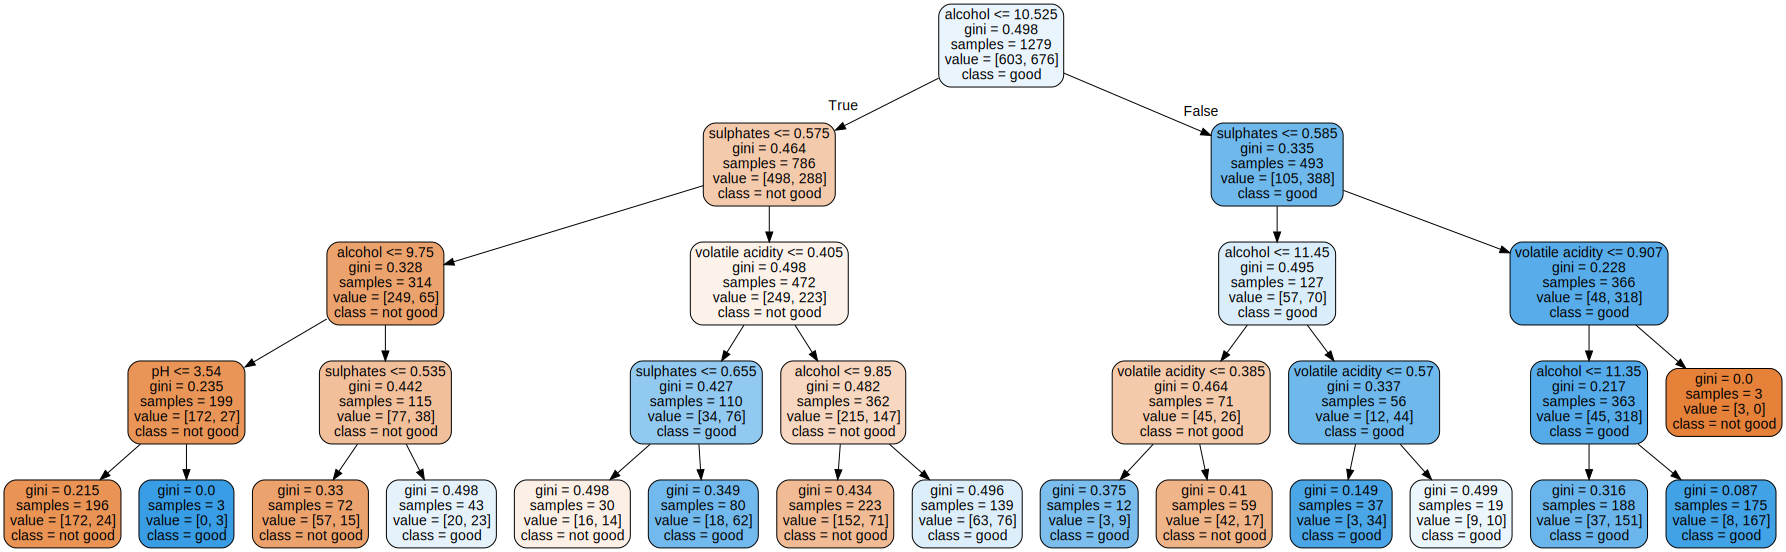

<Figure size 1440x720 with 0 Axes>

In [55]:
import graphviz
plt.figure(figsize = (20,10))
data = tree.export_graphviz(clf,feature_names=x_train_new.columns,class_names = ["not good", "good"], out_file=None, rounded = True, filled = True)
graph = graphviz.Source(data)
graph

In [56]:
?tree.export_graphviz

#### Random Forest Classifier

In [57]:
pipeline = Pipeline([("rfe", RFECV(Ridge(alpha = 1.0,solver = "cholesky"), cv = 5)), ("trees", RandomForestClassifier(max_features = 5, max_depth = 10, n_estimators = 19))])

In [58]:
final_model = pipeline

In [59]:
final_model.fit(x_train, y_train)

Pipeline(steps=[('rfe', RFECV(cv=5, estimator=Ridge(solver='cholesky'))),
                ('trees',
                 RandomForestClassifier(max_depth=10, max_features=5,
                                        n_estimators=19))])

In [60]:
final_model["trees"].feature_importances_

array([0.0503337 , 0.10417409, 0.04954789, 0.05312883, 0.06160374,
       0.05120322, 0.09709332, 0.08084284, 0.06023472, 0.15823848,
       0.23359917])

In [61]:
final_model["rfe"].ranking_
feature = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 
           'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
feature_rank = pd.DataFrame({"feature":feature, "rank":final_model["rfe"].ranking_})
feature_rank

,feature,rank
0,fixed acidity,1
1,volatile acidity,1
2,citric acid,1
3,residual sugar,1
4,chlorides,1
5,free sulfur dioxide,1
6,total sulfur dioxide,1
7,density,1
8,pH,1
9,sulphates,1


#### Metrics

In [62]:
y_train_pred = cross_val_predict(final_model, x_train, y_train, cv = 5)

In [63]:
new_train = x_train.copy()
new_train["quality"] = y_train
new_train["predicted quality"] = y_train_pred
new_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted quality
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,1,1
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,1,1
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,1,1
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,0,0
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,0,0


In [64]:
precision_score(y_train, y_train_pred)

0.8090909090909091

In [65]:
recall_score(y_train, y_train_pred)

0.7899408284023669

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.7904612978889758

In [67]:
f1_score(y_train, y_train_pred)

0.7994011976047904

In [68]:
conf = confusion_matrix(y_train, y_train_pred)

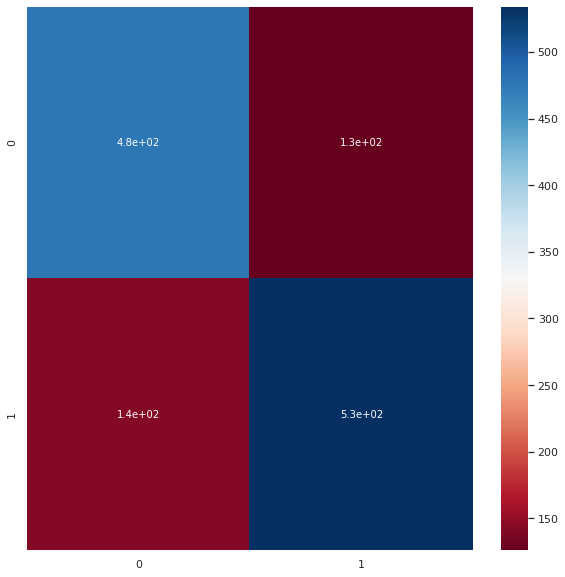

In [69]:
plt.figure(figsize = (10,10))
sns.heatmap(conf, annot= True, cmap = "RdBu")
plt.show();

In [70]:
cross_val_score(final_model, x_train, y_train, cv = 5)

array([0.77734375, 0.77734375, 0.7734375 , 0.78125   , 0.86666667])

In [71]:
precisions, recall, threshold = precision_recall_curve(y_train, y_train_pred)

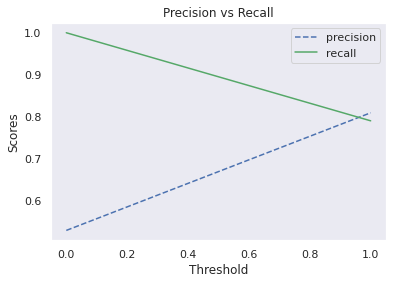

In [72]:
sns.set_theme(style="dark")
##plt.figure(figsize = (20,8))
plt.plot(threshold, precisions[:-1],'b--',label = "precision")
plt.plot(threshold, recall[:-1], 'g-', label = "recall")
plt.title("Precision vs Recall")
plt.xlabel("Threshold")
plt.ylabel("Scores")
plt.legend()
plt.show();

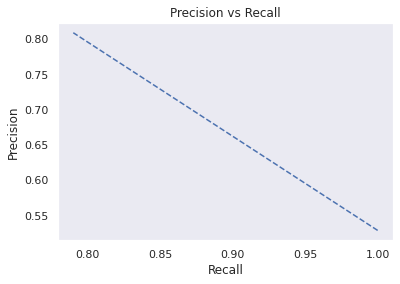

In [73]:
##plt.figure(figsize = (20,8))
plt.plot(recall[:-1], precisions[:-1], 'b--')
plt.title("Precision vs Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show();

In [74]:
fpr, tpr, threshold = roc_curve(y_train, y_train_pred)

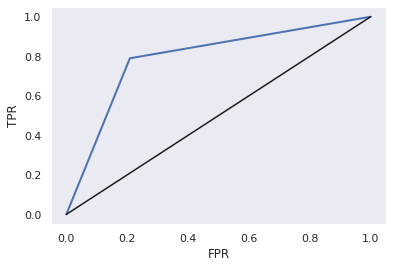

In [75]:
##plt.figure(figsize = (20,8))
plt.plot(fpr, tpr, "b-", linewidth = 2)
plt.plot([0,1], [0,1], "k-")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show();

In [76]:
roc_auc_score(y_train, y_train_pred)

0.7904928022608849

In [ ]:
### Testing dataset

### Testing dataset

In [77]:
y_pred = final_model.predict(x_test)

In [78]:
precision_score(y_test, y_pred)

0.8057142857142857

In [79]:
recall_score(y_test, y_pred)

0.7877094972067039

In [80]:
accuracy_score(y_test, y_pred)

0.775

In [81]:
f1_score(y_test, y_pred)

0.7966101694915254

In [82]:
roc_auc_score(y_test, y_pred)

0.773287372716827

In [83]:
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred)

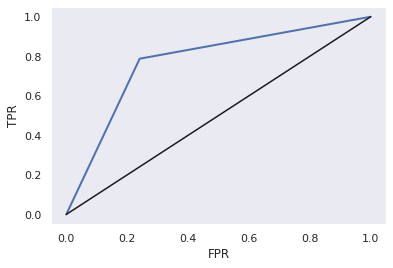

In [84]:
plt.plot(fpr2, tpr2, "b-", linewidth = 2)
plt.plot([0,1], [0,1], "k-")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show();

In [85]:
conf2 = confusion_matrix(y_test, y_pred)

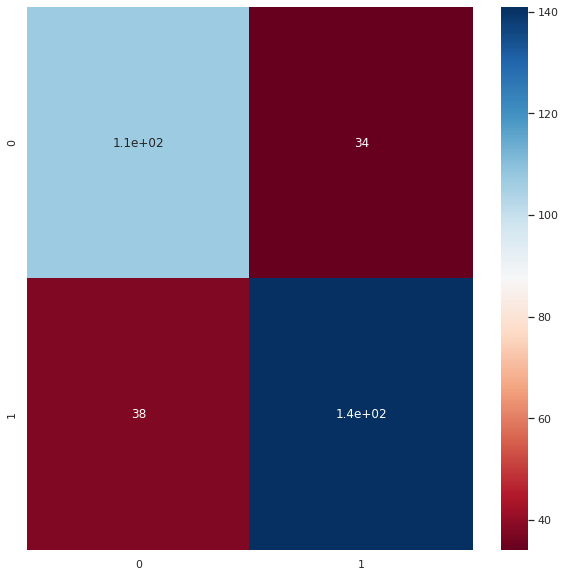

In [86]:
plt.figure(figsize = (10,10))
sns.heatmap(conf2, annot= True, cmap = "RdBu")
plt.show();